# Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Importing Data

In [2]:
df_train=pd.read_csv('./data/train.csv')
df_test=pd.read_csv('./data/test.csv')

## Having a glimpse at Data

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
df_train.shape

(1460, 81)

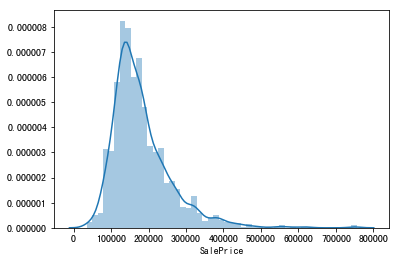

In [5]:
sns.distplot(df_train['SalePrice'])

In [6]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [7]:
df_train['SalePrice']= np.log(df_train['SalePrice'])

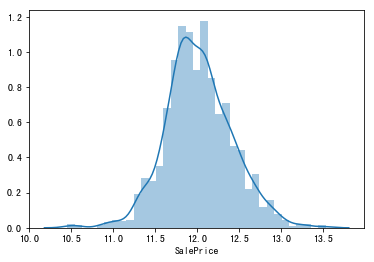

In [8]:
sns.distplot(df_train['SalePrice'])

## Checking for the null values

In [9]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [10]:
nullRate=df_train.isnull().sum()/len(df_train)

In [11]:
nullRate

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
                   ...   
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
Fireplaces       0.000000
FireplaceQu      0.472603
GarageType  

In [12]:
nullRate=nullRate[nullRate>0]

In [13]:
nullRate.sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [14]:
corr=df_train.corr()['SalePrice']

In [15]:
corr[corr>0.3].sort_values()

HalfBath        0.313982
2ndFlrSF        0.319300
OpenPorchSF     0.321053
WoodDeckSF      0.334135
LotFrontage     0.355878
BsmtFinSF1      0.372023
MasVnrArea      0.430809
Fireplaces      0.489449
TotRmsAbvGrd    0.534422
GarageYrBlt     0.541073
YearRemodAdd    0.565608
YearBuilt       0.586570
FullBath        0.594771
1stFlrSF        0.596981
TotalBsmtSF     0.612134
GarageArea      0.650888
GarageCars      0.680625
GrLivArea       0.700927
OverallQual     0.817184
SalePrice       1.000000
Name: SalePrice, dtype: float64

## Delete the corresponding variable(missing > 15%)

In [16]:
train_data=df_train

In [17]:
# train_data=train_data.drop(nullRate[nullRate>0.85].index,1)

In [18]:
train_data.shape

(1460, 81)

## Filling missing values

### Filling numerical values

In [19]:
train_data.mean()

Id                 730.500000
MSSubClass          56.897260
LotFrontage         70.049958
LotArea          10516.828082
OverallQual          6.099315
OverallCond          5.575342
YearBuilt         1971.267808
YearRemodAdd      1984.865753
MasVnrArea         103.685262
BsmtFinSF1         443.639726
BsmtFinSF2          46.549315
BsmtUnfSF          567.240411
TotalBsmtSF       1057.429452
1stFlrSF          1162.626712
2ndFlrSF           346.992466
LowQualFinSF         5.844521
GrLivArea         1515.463699
BsmtFullBath         0.425342
BsmtHalfBath         0.057534
FullBath             1.565068
HalfBath             0.382877
BedroomAbvGr         2.866438
KitchenAbvGr         1.046575
TotRmsAbvGrd         6.517808
Fireplaces           0.613014
GarageYrBlt       1978.506164
GarageCars           1.767123
GarageArea         472.980137
WoodDeckSF          94.244521
OpenPorchSF         46.660274
EnclosedPorch       21.954110
3SsnPorch            3.409589
ScreenPorch         15.060959
PoolArea  

In [20]:
train_data.median()

Id                730.500000
MSSubClass         50.000000
LotFrontage        69.000000
LotArea          9478.500000
OverallQual         6.000000
OverallCond         5.000000
YearBuilt        1973.000000
YearRemodAdd     1994.000000
MasVnrArea          0.000000
BsmtFinSF1        383.500000
BsmtFinSF2          0.000000
BsmtUnfSF         477.500000
TotalBsmtSF       991.500000
1stFlrSF         1087.000000
2ndFlrSF            0.000000
LowQualFinSF        0.000000
GrLivArea        1464.000000
BsmtFullBath        0.000000
BsmtHalfBath        0.000000
FullBath            2.000000
HalfBath            0.000000
BedroomAbvGr        3.000000
KitchenAbvGr        1.000000
TotRmsAbvGrd        6.000000
Fireplaces          1.000000
GarageYrBlt      1980.000000
GarageCars          2.000000
GarageArea        480.000000
WoodDeckSF          0.000000
OpenPorchSF        25.000000
EnclosedPorch       0.000000
3SsnPorch           0.000000
ScreenPorch         0.000000
PoolArea            0.000000
MiscVal       

In [21]:
train_data = train_data.fillna(train_data.median())

In [22]:
tmp=train_data.isnull().sum().sort_values()

In [23]:
tmp[tmp>0]

Electrical         1
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtFinType2      38
BsmtExposure      38
GarageQual        81
GarageFinish      81
GarageCond        81
GarageType        81
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [24]:
tmp[tmp>0].shape

(16,)

### Filling categorial values

In [25]:
train_data = train_data.fillna('None')

In [26]:
tmp = train_data.isnull().sum().sort_values()

In [27]:
tmp[tmp>0].shape

(0,)

In [28]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0   None  None        None       0      2   
1         Lvl    AllPub  ...        0   None  None        None       0      5   
2         Lvl    AllPub  ...        0   None  None        None       0      9   
3         Lvl    AllPub  ...        0   None  None        None       0      2   
4         Lvl    AllPub  ...        0   None  None        None       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal  12.247694  
1   2007        WD         Normal  12.109011  
2   2008        WD         Normal  12.317167  
3   2006        WD        Abnorml  11.849398  
4   2008        WD         Normal  12.429216  

[5 rows x 81 columns]

# Training Set

In [29]:
X = pd.get_dummies(train_data).reset_index(drop=True)

In [30]:
X.shape

(1460, 305)

In [31]:
X

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60         69.0    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20         69.0    12968            5            6   
13      14          20         91.0    10652            7            5   
14      15          20         69.0    10920            6            5   
15      16          45         51.0     6120            7            8   
16      17          20         69.0    11241            6            7   
17      18          90         72.0    10791            4            5   
18      19          20         66.0    13695            5            5   
19      20          20         70.0     7560            5            6   
20      21          60        101.0    14215            8            5   
21      22          45         57.0     7449            7            7   
22      23          20         75.0     9742            8            5   
23      24         120         44.0     4224            5            7   
24      25          20         69.0     8246            5            8   
25      26          20        110.0    14230            8            5   
26      27          20         60.0     7200            5            7   
27      28          20         98.0    11478            8            5   
28      29          20         47.0    16321            5            6   
29      30          30         60.0     6324            4            6   
...    ...         ...          ...      ...          ...          ...   
1430  1431          60         60.0    21930            5            5   
1431  1432         120         69.0     4928            6            6   
1432  1433          30         60.0    10800            4            6   
1433  1434          60         93.0    10261            6            5   
1434  1435          20         80.0    17400            5            5   
1435  1436          20         80.0     8400            6            9   
1436  1437          20         60.0     9000            4            6   
1437  1438          20         96.0    12444            8            5   
1438  1439          20         90.0     7407            6            7   
1439  1440          60         80.0    11584            7            6   
1440  1441          70         79.0    11526            6            7   
1441  1442         120         69.0     4426            6            5   
1442  1443          60         85.0    11003           10            5   
1443  1444          30         69.0     8854            6            6   
1444  1445          20         63.0     8500            7            5   
1445  1446          85         70.0     8400            6            5   
1446  1447          20         69.0    26142            5            7   
1447  1448          60         80.0    10000            8            5   
1448  1449          50         70.0    11767            4            7   
1449  1450         180         21.0     1533            5            7   
1450  1451          90         60.0     9000            5            5   
1451  1452          20         78.0     9262            8            5   
1452  1453  

In [32]:
y = X['SalePrice']/10000
X = X.drop(['Id','SalePrice'],axis=1)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# LinearRegression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [36]:
lm=LinearRegression()
lm.fit(X_train,y_train)
pred=lm.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test,pred))

1.1689446485368255e-05

In [38]:
np.sqrt(mean_squared_error(np.log(y_test),np.log(pred)))

0.009952692244139315

# Preprocessing

In [39]:
from sklearn.pipeline import make_pipeline

In [40]:
from sklearn.preprocessing import RobustScaler

In [41]:
lm_model=make_pipeline(RobustScaler(),LinearRegression())

In [42]:
lm_model.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [43]:
def benchmark(model):
    pred=model.predict(X_test)
    logrmse=np.sqrt(mean_squared_error(np.log(y_test),np.log(pred)))
    return logrmse

In [44]:
def benchmark1(model,testset,label):
    pred=model.predict(testset)
    if pred[pred<0].shape[0]>0 :
        print('Neg Value')
    rmse=np.sqrt(mean_squared_error(label,pred))
    lrmse=np.sqrt(mean_squared_error(np.log(label),np.log(pred)))

    print('RMSE:',rmse)
    print('LRMSE:',lrmse)
    return lrmse

In [45]:
# benchmark(lm_model)

# RidgeRegression

In [46]:
from sklearn.linear_model import Ridge

In [47]:
ridge_model=Ridge(alpha=46)

In [48]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=46, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
benchmark1(ridge_model,X_test,y_test)

RMSE: 1.0518244875908769e-05
LRMSE: 0.008891083668498997


0.008891083668498997

# Lasso Regression

In [50]:
from sklearn.linear_model import LassoCV

In [51]:
from sklearn.model_selection import KFold

In [52]:
kfolds=KFold(n_splits=10,shuffle=True,random_state=123)

In [53]:
l_alphas=np.logspace(-10,2.8,150)

In [54]:
lasso_model=make_pipeline(RobustScaler(),
                           LassoCV(alphas=l_alphas,
                                   cv=kfolds)).fit(X_train,y_train)

In [55]:
benchmark1(lasso_model,X_test,y_test)

RMSE: 1.0121113897456504e-05
LRMSE: 0.00857740670031837


0.00857740670031837

# ElasticNet

In [56]:
from sklearn.linear_model import ElasticNetCV

In [57]:
e_l1ratio=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95,1]

In [58]:
e_alphas=l_alphas

In [59]:
elastic_model2=make_pipeline(RobustScaler(),
                             ElasticNetCV(alphas=e_alphas,l1_ratio=e_l1ratio)).fit(X_train,y_train)

In [60]:
benchmark1(elastic_model2,X_test,y_test)

RMSE: 1.0121113897456504e-05
LRMSE: 0.00857740670031837


0.00857740670031837

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rf_model = RandomForestRegressor(n_estimators=800,
                                 max_depth=35,
                                 min_samples_leaf=1,
                                 random_state=123
                                ) 

In [63]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=35,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [64]:
benchmark1(rf_model,X_test,y_test)

RMSE: 3.855212928788273e-05
LRMSE: 0.031965303492385036


0.031965303492385036

# XGBoost

In [65]:
import xgboost as xgb

In [66]:
xgboost=make_pipeline(RobustScaler(),
                      xgb.XGBRegressor(objective='reg:linear',
                                       subsample=0.8,
                                       n_estimators=800,
                                       learning_rate=0.05,
                                       random_state=123))

In [67]:
xgboost.fit(X_train,y_train)

[15:04:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('xgbregressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', le...ha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1))])

In [68]:
benchmark1(xgboost,X_test,y_test)

RMSE: 3.856771953746572e-05
LRMSE: 0.03197230516600616


0.03197230516600616

# Stacking

## Level 1

In [69]:
from mlxtend.regressor import StackingCVRegressor

In [70]:
from sklearn.linear_model import RidgeCV

In [71]:
alphas_alt=np.logspace(-10,2.8,150)

In [72]:
ridge=make_pipeline(RobustScaler(),RidgeCV(alphas=alphas_alt,cv=5))

In [73]:
lasso=make_pipeline(RobustScaler(),LassoCV(alphas=alphas_alt,cv=5))

In [74]:
elasticnet=make_pipeline(RobustScaler(),ElasticNetCV(alphas=e_alphas,cv=5,l1_ratio=e_l1ratio))

In [75]:
xgboost=make_pipeline(RobustScaler(),xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.7,learning_rate=0.1,max_depth=3,n_estimators=560,subsample=0.7,reg_alpha=0.00006,gamma=0,nthread=6,scale_pos_weight=1,seed=27))

## Level 2

In [76]:
stack=StackingCVRegressor(regressors=(ridge,lasso,elasticnet,xgboost),meta_regressor=xgboost,use_features_in_secondary=False)

In [77]:
stackX=np.array(X_train)

In [78]:
stacky=np.array(y_train)

In [79]:
stack.fit(stackX,stacky)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[15:09:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:09:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:09:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:09:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:09:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:09:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:10:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingCVRegressor(cv=5,
          meta_regressor=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('xgbregressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       importance_type='gain', ...=6e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=None, subsample=0.7, verbosity=1))]),
          n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
          refit=True,
          regressors=(Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridgecv', RidgeCV(alphas=array([1.00000e-10, 1.21873e-10, ..., 5.17719e+02, 6.30957e+02]),
    cv=5, fit_intercept=True, gcv_mode=Non...e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=None, subsample=0.7, verbosity=1))])),
          sh

In [80]:
benchmark1(stack,X_test,y_test)

RMSE: 3.854979398954311e-05
LRMSE: 0.03196448434202707


0.03196448434202707

# DNN

In [81]:
import keras

Using TensorFlow backend.


In [82]:
import tensorflow as tf 

In [83]:
from keras.models import Sequential

In [84]:
from keras.layers import Dense,Dropout
from keras.layers import BatchNormalization

In [85]:
from keras import metrics

In [86]:
from keras import backend as K

In [107]:
def create_model():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1],activation='relu'))
    model.add(Dense(300,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(150,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(50,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1))
    return model

In [108]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                3040      
_________________________________________________________________
dense_7 (Dense)              (None, 300)               3300      
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
dense_8 (Dense)              (None, 150)               45150     
_________________________________________________________________
batch_normalization_5 (Batch (None, 150)               600       
_________________________________________________________________
dense_9 (Dense)              (None, 50)                7550      
_________________________________________________________________
batch_normalization_6 (Batch (None, 50)                200       
__________

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
model=create_model()
model.compile(optimizer='adam',loss='mean_squared_error')

In [111]:
history=model.fit(X_train,y_train,epochs=400,batch_size=32,verbose=0,validation_data=(X_test,y_test))

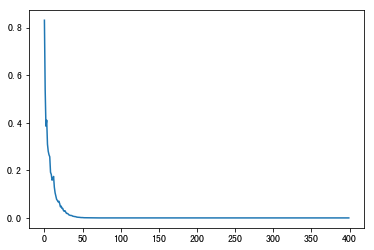

In [112]:
plt.plot(history.history['loss'])#训练Loss

# Bagging提交

In [114]:
from sklearn import ensemble

In [119]:
bagging_alg=[
    ('Lasso',Lasso(),
    ('Ridge',Ridge()),
    ('ElasticNet',ElasticNetCV()),
    ('RF',RandomForestRegressor()),
    ('xgb',xgb.XGBRegressor()),
    ('stacking',StackingCVRegressor(regressors=(ridge,lasso,elasticnet,xgboost),meta_regressor=xgboost)),
    ('DNN',model)
]

In [145]:
bagging_regressor = ensemble.BaggingRegressor(base_estimator=bagging_alg,n_estimators=7,max_samples=0.8,random_state=123)